### Life Cycle of a Machine Learning Project


* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-processing
* Model Training
* Choose best model

### Problem Statement

* This daatset comprises used cars sold on cardekho.com in india as well as important features of these cars.

* If user can predict the price of the car based on input features.

* Prediction results can be used to give new seller the price suggestion based on market condition.

### Import data and required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline

import os

### Download and import the CSV data as pandas DataFrame

In [2]:
download_dir = "./data/"

In [3]:
download_dir

'./data/'

In [4]:
download_url = "https://raw.githubusercontent.com/gbiamgaurav/datasets/main/Cardekho/data.csv"

In [5]:
download_url

'https://raw.githubusercontent.com/gbiamgaurav/datasets/main/Cardekho/data.csv'

In [6]:
os.makedirs(download_dir, exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col=False)

In [7]:
## Show top 5 records

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
## Shape of the dataset

df.shape

(8128, 13)

In [9]:
## Summary of the dataset

df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
## Check null datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [11]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [12]:
df['seller_type'].dtype

dtype('O')

In [13]:
df['seller_type'].dtype == "O"

True

In [14]:
df['km_driven'].dtype

dtype('int64')

In [15]:
df['km_driven'].dtype == "int64"

True

In [16]:
## define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))

print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 4 numerical features: ['year', 'selling_price', 'km_driven', 'seats']
We have 9 categorical features: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [17]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


### Feature Information

* year - Which year the car has been manufactured
* selling_price - What was the selling price at the time of manufacture
* km_driven - How much kms have been driven so far
* fuel - what is its fuel type 
* seller_type - what is the car seller type
* transmission - what is the car transmission type - mannual or automatic
* owner - what is the onwer type of the car
* mileage - what is the mileage of the car
* engine - the engine capacity of the car
* max_power - max power it produces in BHP
* torque - max torque it produces in Horsepower
* seats - total number of seats in the car

In [18]:
## proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("----------------------------------------")

Maruti Swift Dzire VDI                             1.587106
Maruti Alto 800 LXI                                1.008858
Maruti Alto LXi                                    0.873524
BMW X4 M Sport X xDrive20d                         0.762795
Maruti Swift VDI                                   0.750492
                                                     ...   
Skoda Fabia 1.4 TDI Ambiente                       0.012303
Mahindra Scorpio VLX 2WD AT BSIII                  0.012303
Renault KWID Climber 1.0 AMT                       0.012303
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV    0.012303
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV       0.012303
Name: name, Length: 2058, dtype: float64
----------------------------------------
Diesel    54.158465
Petrol    44.672736
CNG        0.701280
LPG        0.467520
Name: fuel, dtype: float64
----------------------------------------
Individual          83.243110
Dealer              13.853346
Trustmark Dealer     2.903543
Name: seller_type, d

### Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one",
  The purpose of univariate analysis is to understand the distribution of values for a single variable

### Numerical Features

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_numerical_features(dataframe):
    numerical_features = dataframe.select_dtypes(include=['int64', 'float64'])

    num_cols = len(numerical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

    for i, feature in enumerate(numerical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.histplot(data=dataframe, x=feature, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    # Hide empty subplots if the number of features is odd
    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

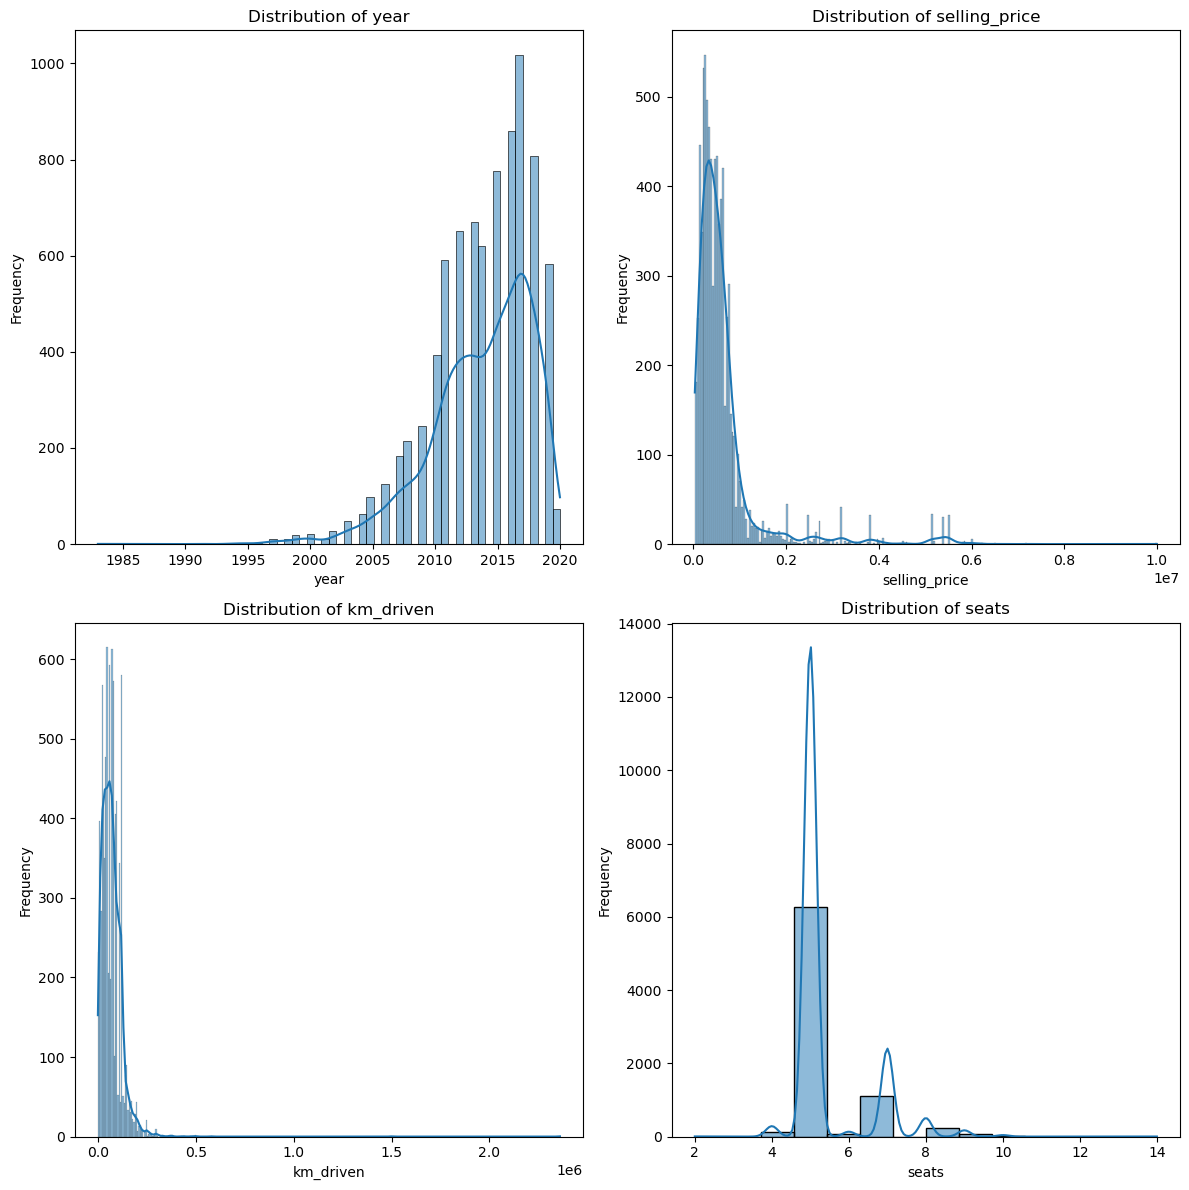

In [57]:
visualize_numerical_features(df)

<Axes: >

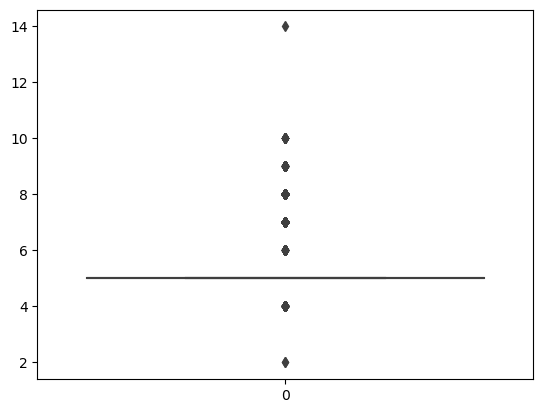

In [59]:
sns.boxplot(df['seats'])

<Axes: >

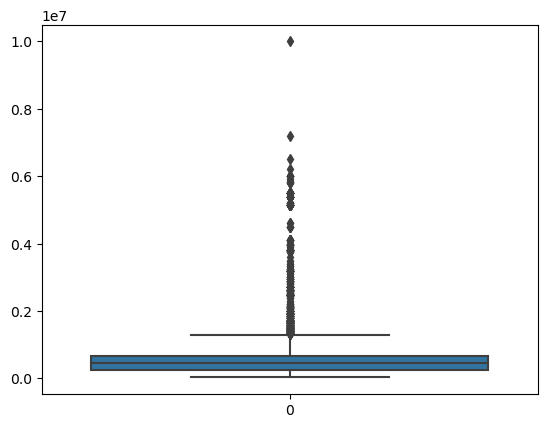

In [60]:
sns.boxplot(df['selling_price'])

### Report


* km_driven, selling_price are right skewed
* outliers in seats and selling_price

In [61]:
## Categorical features

def visualize_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category'])

    num_cols = len(categorical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

    for i, feature in enumerate(categorical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.countplot(x=feature, data=df, ax=ax)
        ax.set_title(f"Countplot of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Hide empty subplots if the number of features is odd
    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

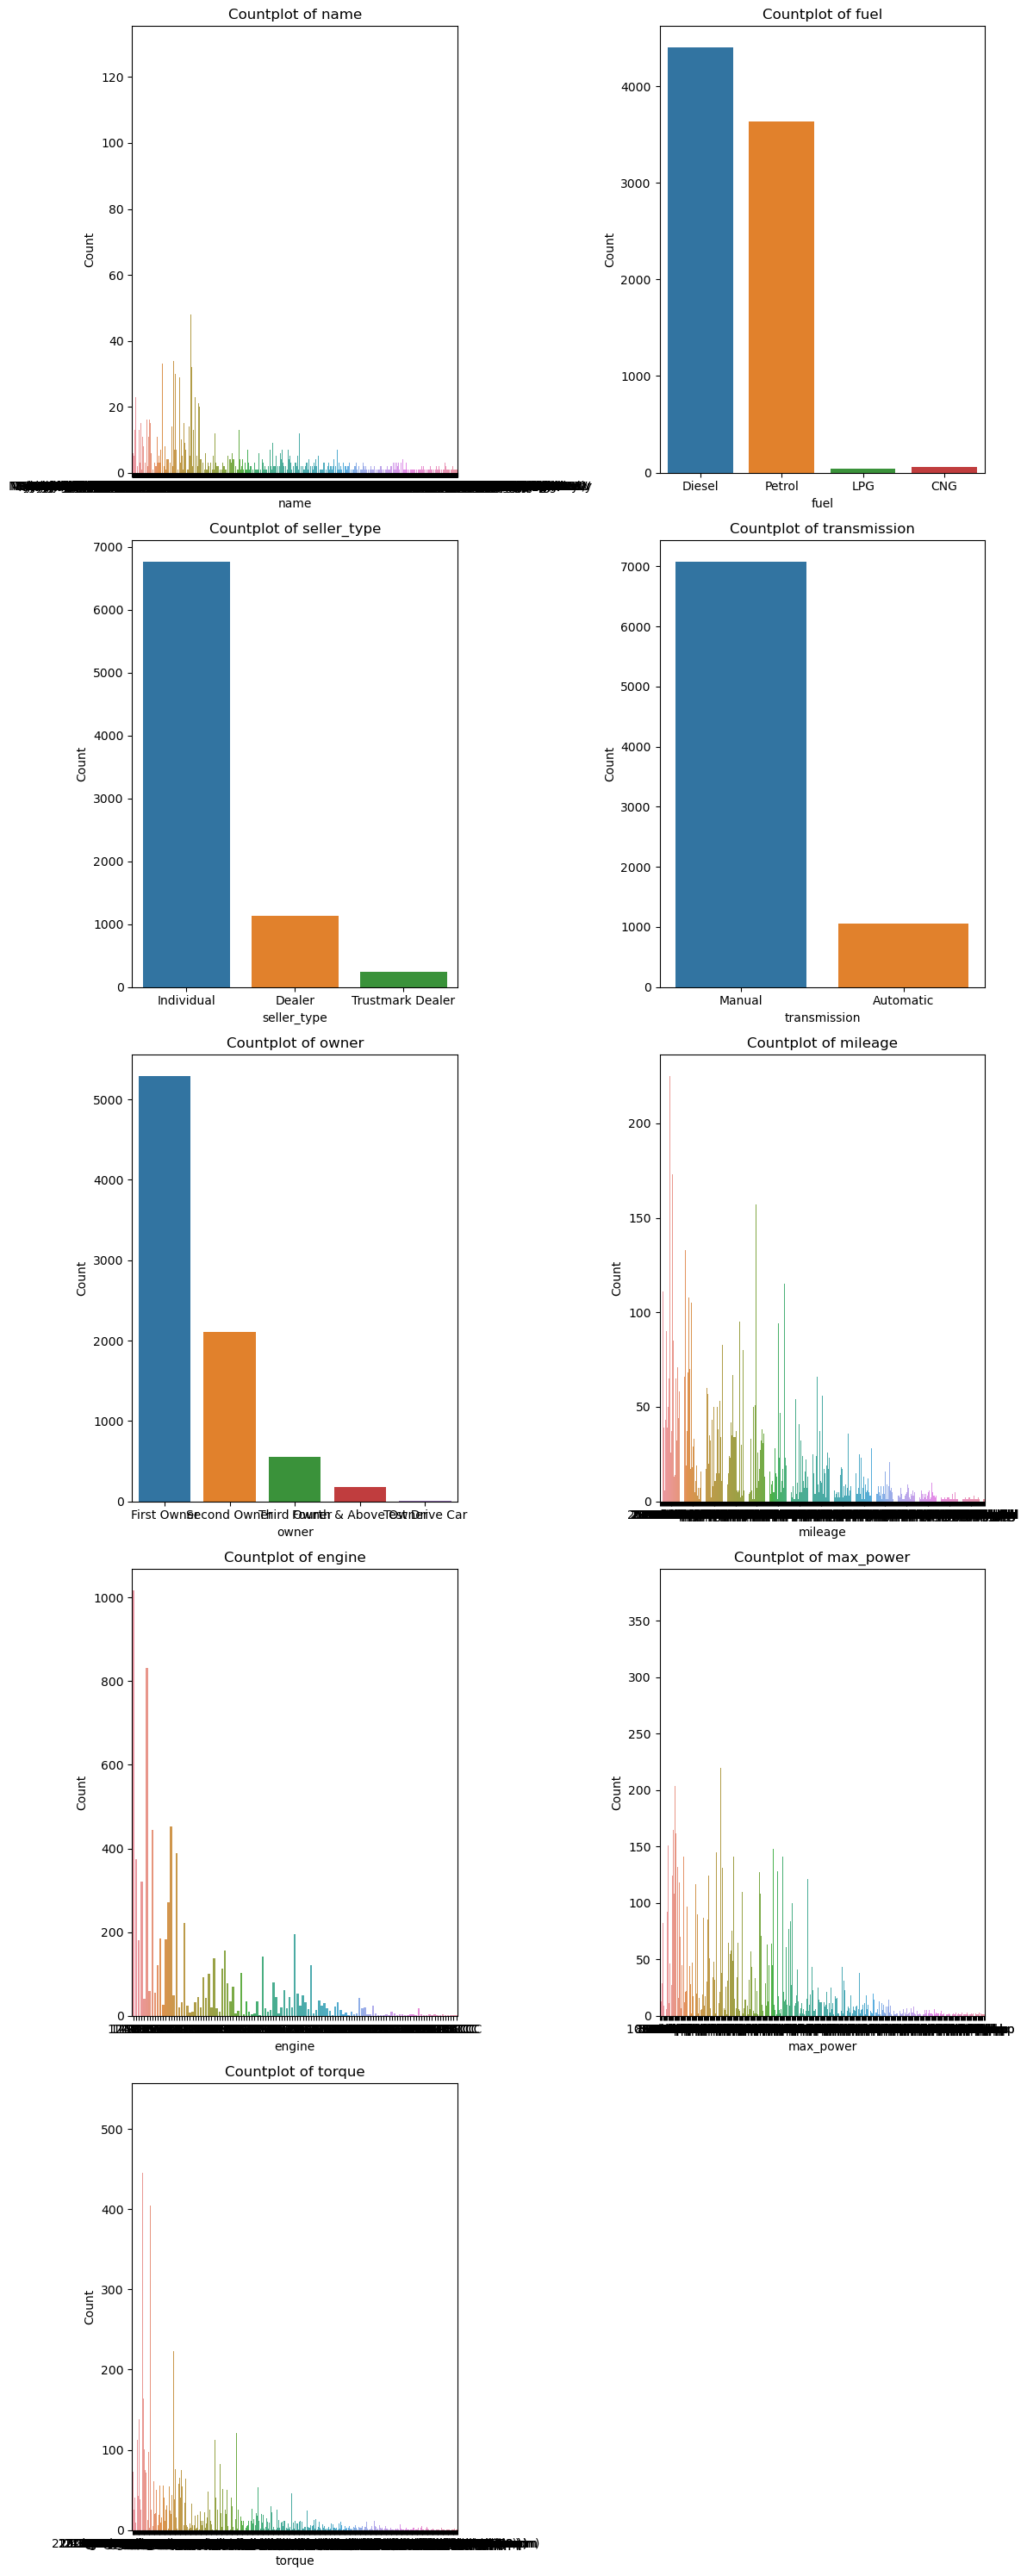

In [62]:
visualize_categorical_features(df)

### Report

* Most of the cars which are on sale are having fuel type of Diesel and petrol, very less number of LPG and CNG cars.
* Most of the cars which are on sale are sold by individuals, followed by dealers.
* More than 7K cars have mannual transmission, whereas 1k cars are of automatic type.
* Most of the cars are of First owner.

### Multivariate Analysis

Multivariate Analysis is the analysis of more than one variable

### Check Multicollinearity in Numerical features

In [63]:
df[(list(df.columns)[1:])].corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


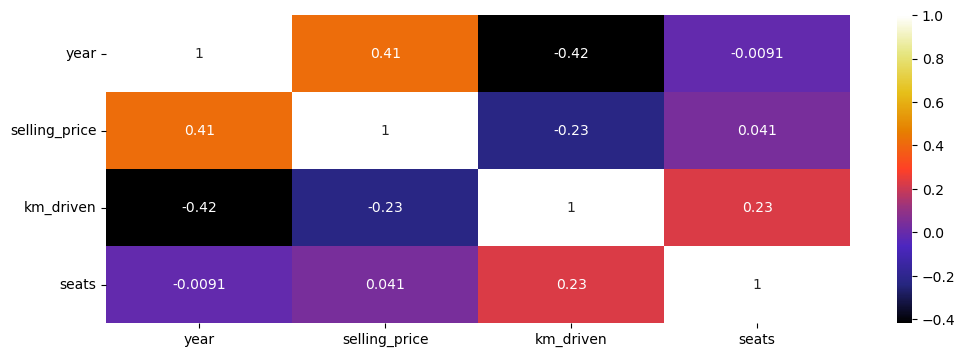

In [72]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot=True, cmap="CMRmap")
plt.show();

In [74]:
## Checking the Null values

df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [75]:
df['mileage'].value_counts()

18.9 kmpl      225
19.7 kmpl      173
18.6 kmpl      164
21.1 kmpl      157
17.0 kmpl      133
              ... 
16.34 kmpl       1
19.69 kmpl       1
20.88 km/kg      1
17.8 km/kg       1
16.51 kmpl       1
Name: mileage, Length: 393, dtype: int64